In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify
import json

In [3]:
debt_data = pd.read_csv("statewise_all_assets_rep.csv", index_col = 0)

In [31]:
debt_data.columns

Index(['state', 'Loan Office Certificates Specie Value',
       'State Liquidated Debt Dollars', 'Pierce Certificates Value',
       'pre1790 total', 'ASD Total', 'CD Total', 'post1790 total', 'pop',
       'pre1790 pct', 'post1790 pct', 'total asset dif',
       'total asset dif (adj)', 'total asset pct dif', 'Loan Office pct',
       'State Liquidated pct', 'Pierce pct', 'CD pct', 'ASD pct',
       'pre1790 total (pop adj)', 'post1790 total (pop adj)',
       'pre1790 pct (pop adj)', 'post1790 pct (pop adj)',
       'total asset dif (pop adj)', 'total asset pct dif (pop adj)'],
      dtype='object')

In [4]:
with open('state_abbrev.json') as json_file:
    us_state_to_abbrev = json.load(json_file)
US_map = gpd.read_file("gz_2010_us_040_00_500k.json")
US_map.replace({"NAME": us_state_to_abbrev}, inplace=True)
df_merged = US_map.merge(debt_data, left_on="NAME", right_on="state")
df_merged = df_merged[df_merged['NAME'] != 'KY']

In [33]:
def set_cbar_labels(axis, labels):
    fig = axis.figure
    cb_ax = fig.axes[1]
    cb_ax.set_xticklabels(labels)
    return None

In [7]:
def makeGraph(colname, title, legendtitle):
    fig1,ax1 = plt.subplots(1,figsize=(10,15))
    plt.title(title)
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("bottom", size="5%", pad=0.1)
    fig1 = df_merged.plot(column = colname, ax = ax1, legend = True, cax=cax1, edgecolor='white',
                          cmap="Oranges", legend_kwds = {'label': legendtitle, 'orientation': 'horizontal'},
                         missing_kwds = {'color': 'lightgrey'})
    df_merged.apply(lambda x: ax1.annotate(text=x['NAME'], xy=x.geometry.centroid.coords[0], 
                                           ha='center', fontsize=7, color='black'), axis=1);
    ax1.set_axis_off()
    #set_cbar_labels(ax1)
    plt.show()

## Total Debt Breakdown

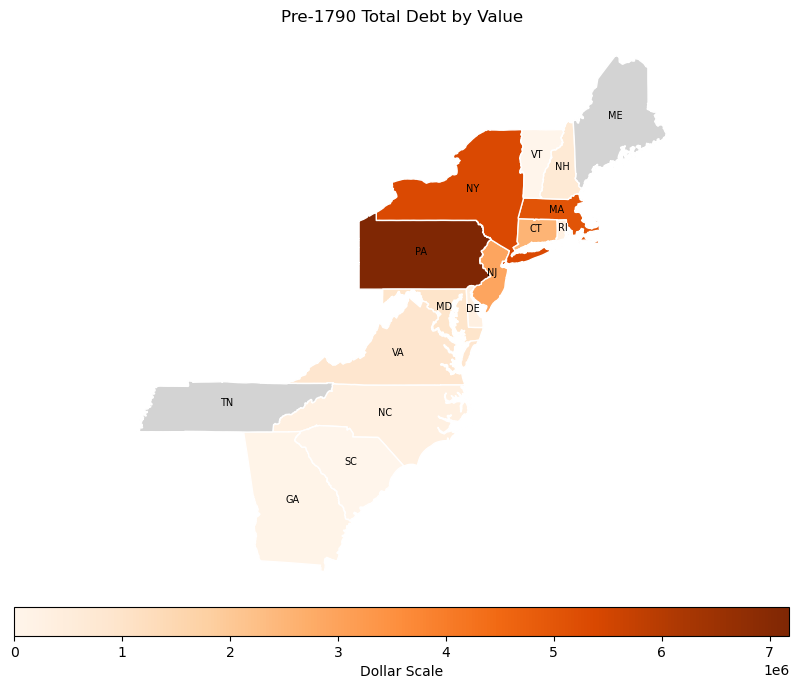

In [8]:
makeGraph('pre1790 total', "Pre-1790 Total Debt by Value", "Dollar Scale")

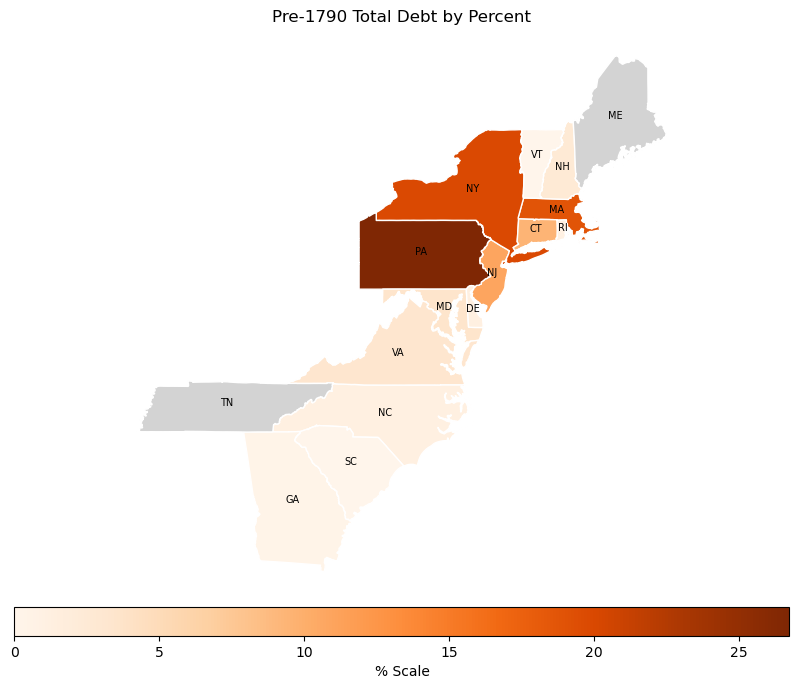

In [9]:
makeGraph('pre1790 pct', "Pre-1790 Total Debt by Percent", "% Scale")

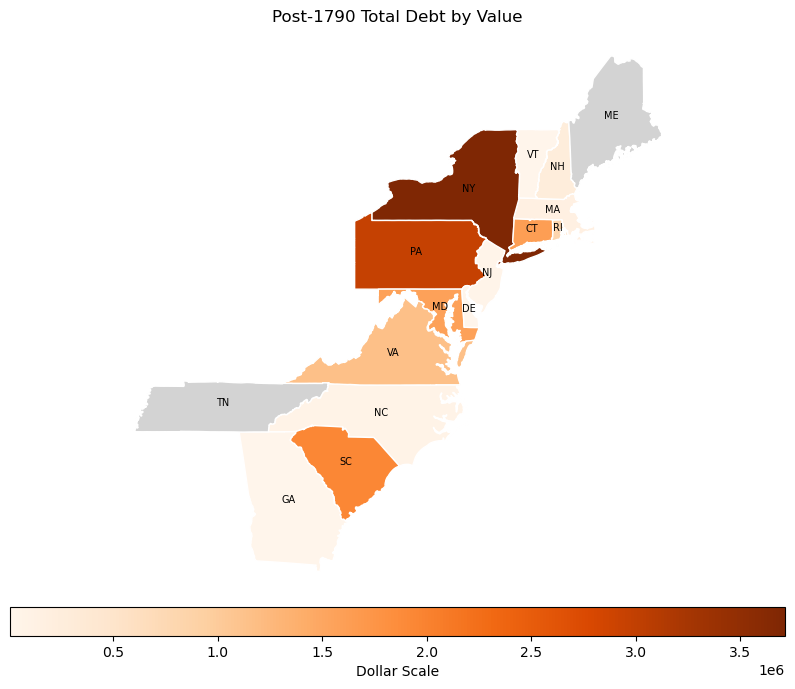

In [10]:
makeGraph('post1790 total', "Post-1790 Total Debt by Value", "Dollar Scale")

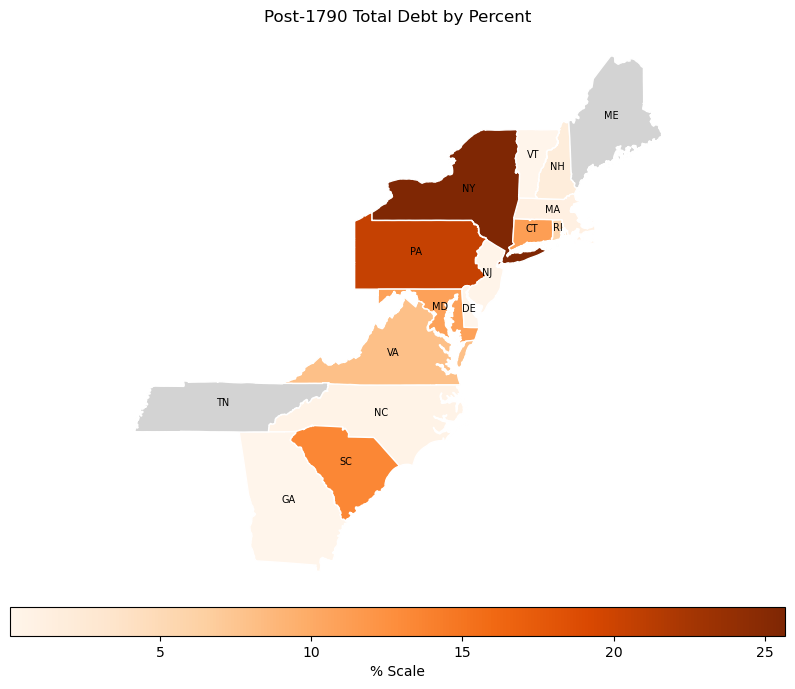

In [11]:
makeGraph('post1790 pct', "Post-1790 Total Debt by Percent", "% Scale")

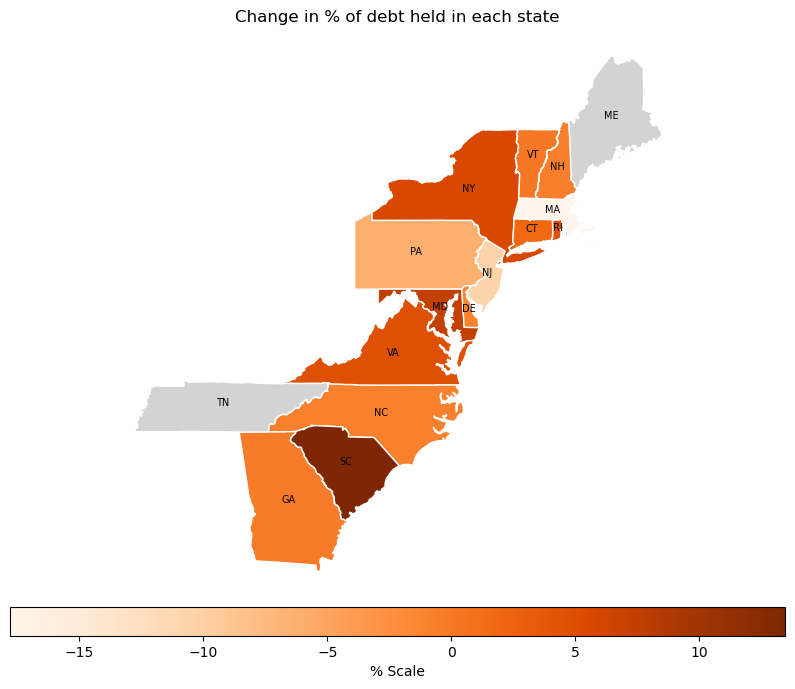

In [12]:
makeGraph('total asset pct dif', "Change in % of debt held in each state", "% Scale")

## Total Debt Breakdown (per Capita)

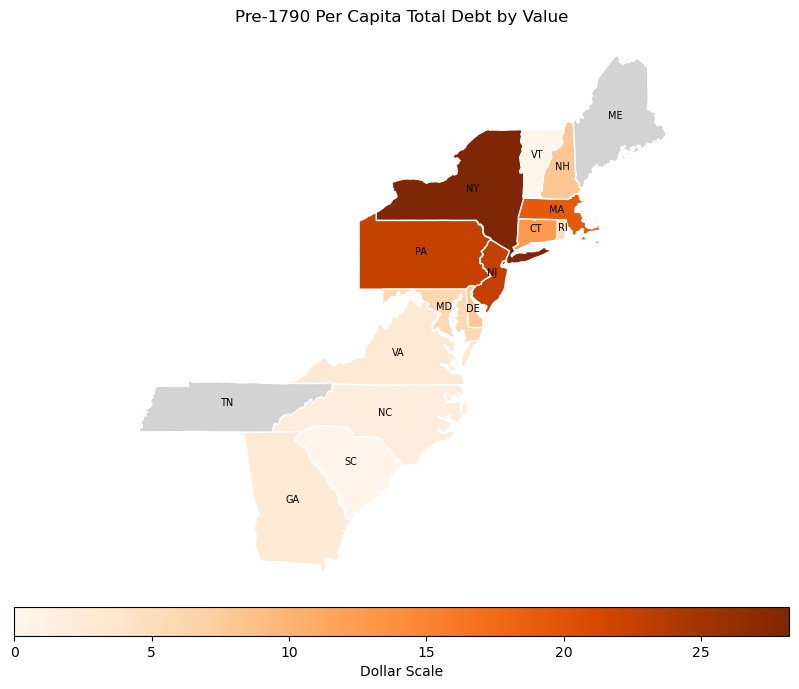

In [13]:
makeGraph('pre1790 total (pop adj)', "Pre-1790 Per Capita Total Debt by Value", "Dollar Scale")

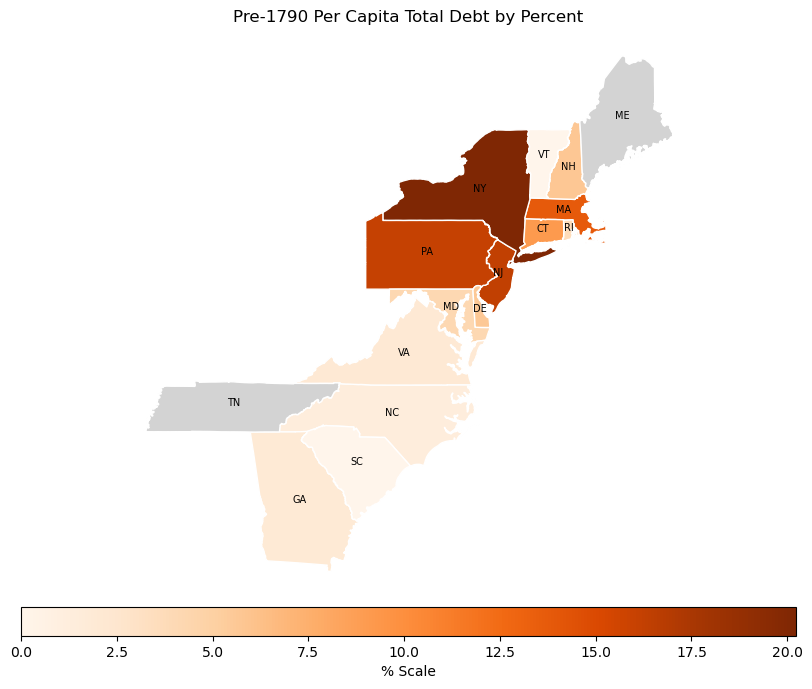

In [14]:
makeGraph('pre1790 pct (pop adj)', "Pre-1790 Per Capita Total Debt by Percent", "% Scale")

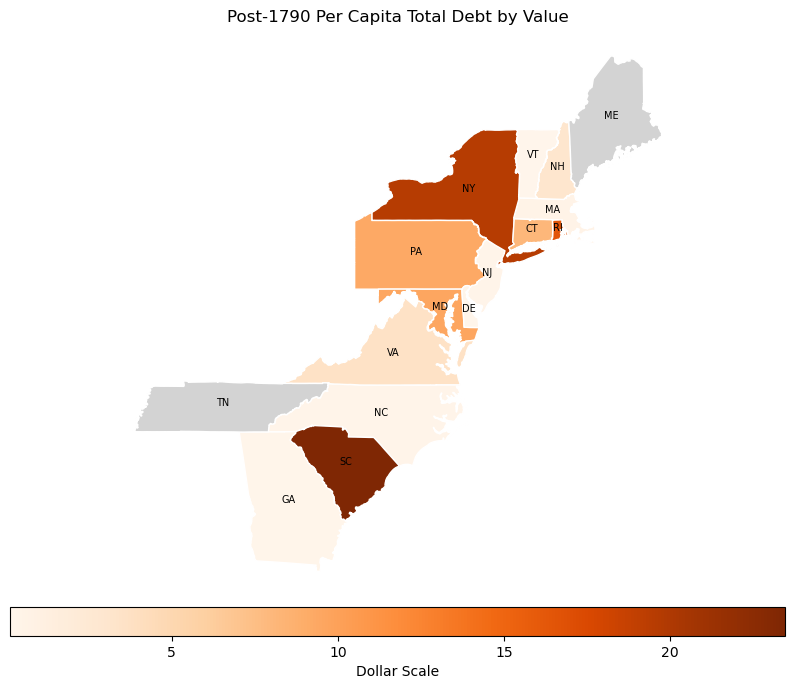

In [15]:
makeGraph('post1790 total (pop adj)', "Post-1790 Per Capita Total Debt by Value", "Dollar Scale")

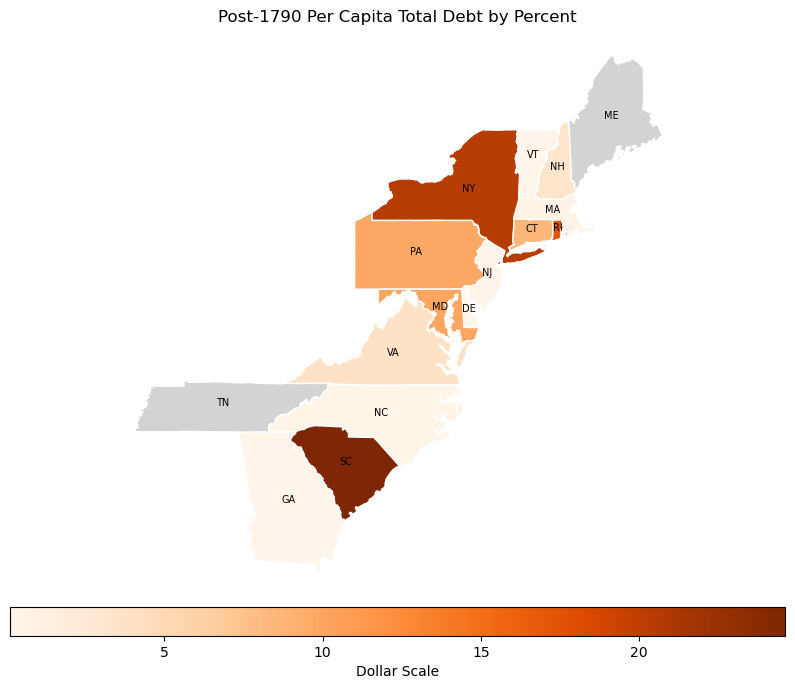

In [16]:
makeGraph('post1790 pct (pop adj)', "Post-1790 Per Capita Total Debt by Percent", "Dollar Scale")

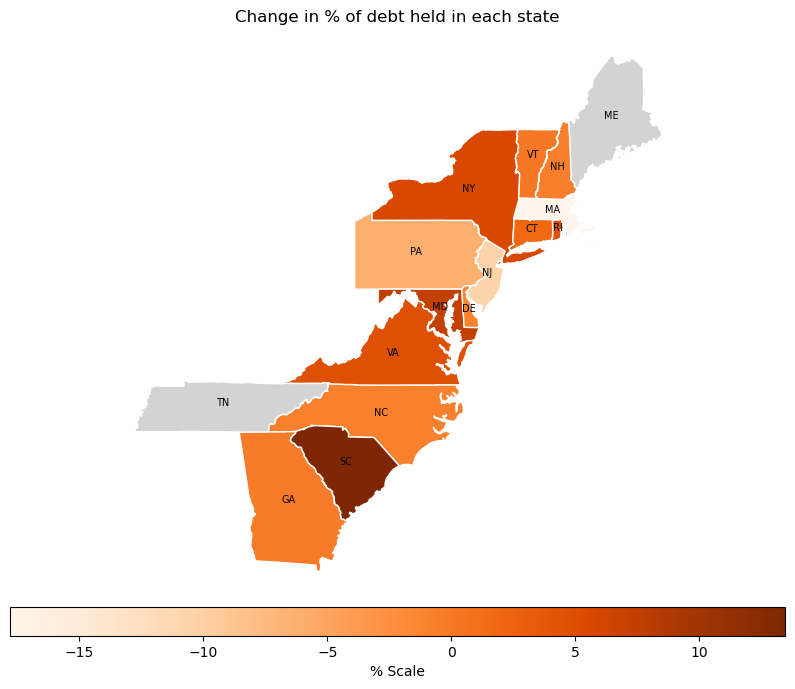

In [17]:
makeGraph('total asset pct dif', "Change in % of debt held in each state", "% Scale")

## Pre-1790 Individual Debt breakdown

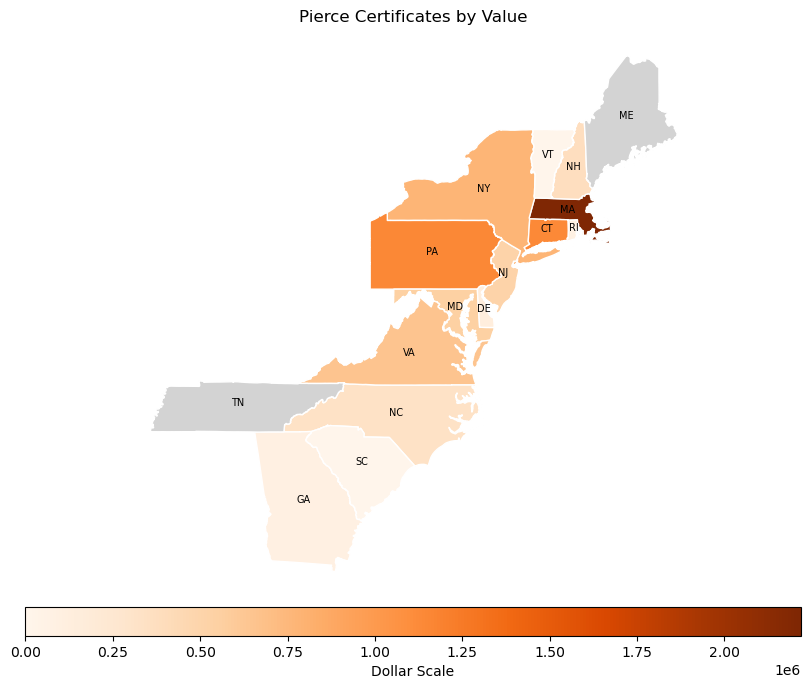

In [18]:
makeGraph("Pierce Certificates Value", "Pierce Certificates by Value", "Dollar Scale")

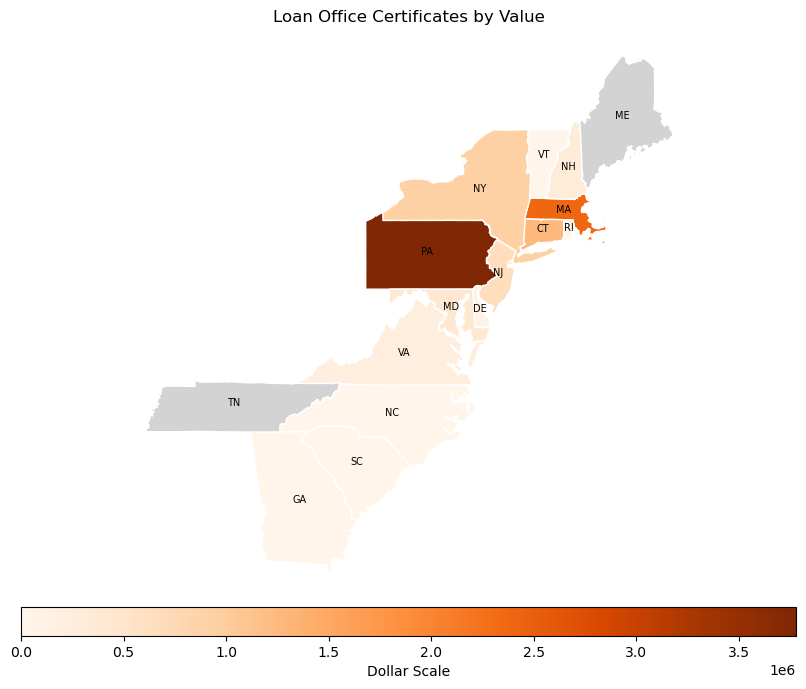

In [19]:
makeGraph("Loan Office Certificates Specie Value", "Loan Office Certificates by Value", "Dollar Scale")

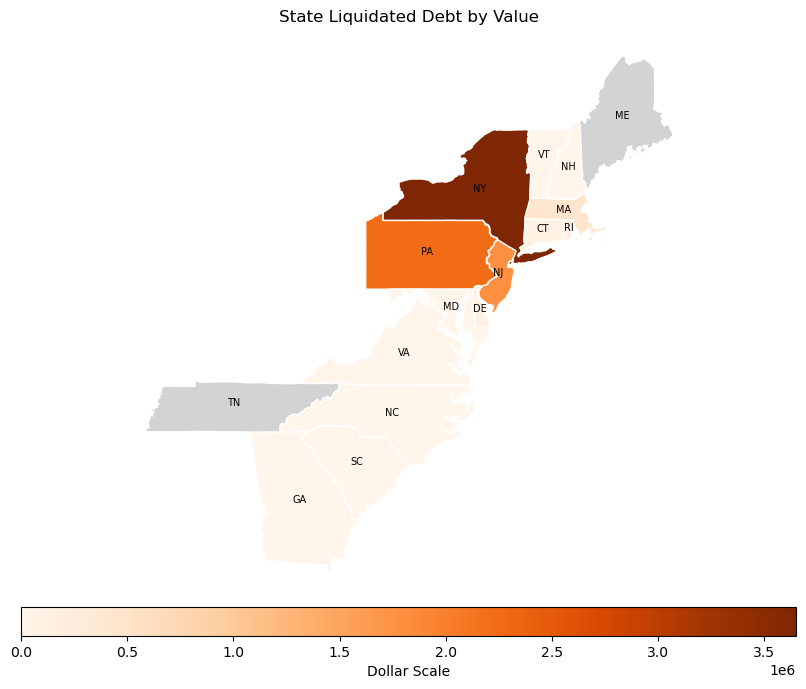

In [20]:
makeGraph("State Liquidated Debt Dollars", "State Liquidated Debt by Value", "Dollar Scale")

## Post-1790 Individual debt Breakdown

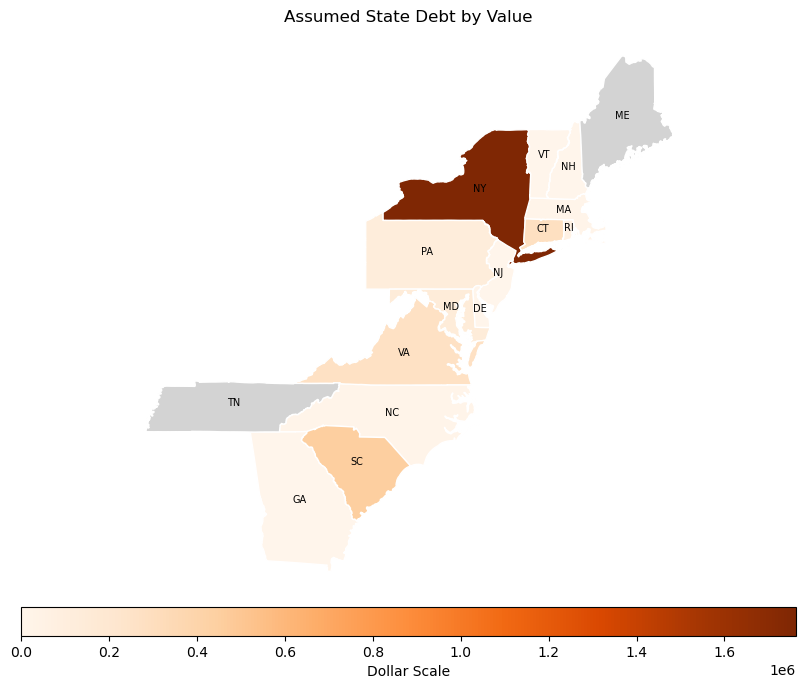

In [21]:
makeGraph("ASD Total", "Assumed State Debt by Value", "Dollar Scale")

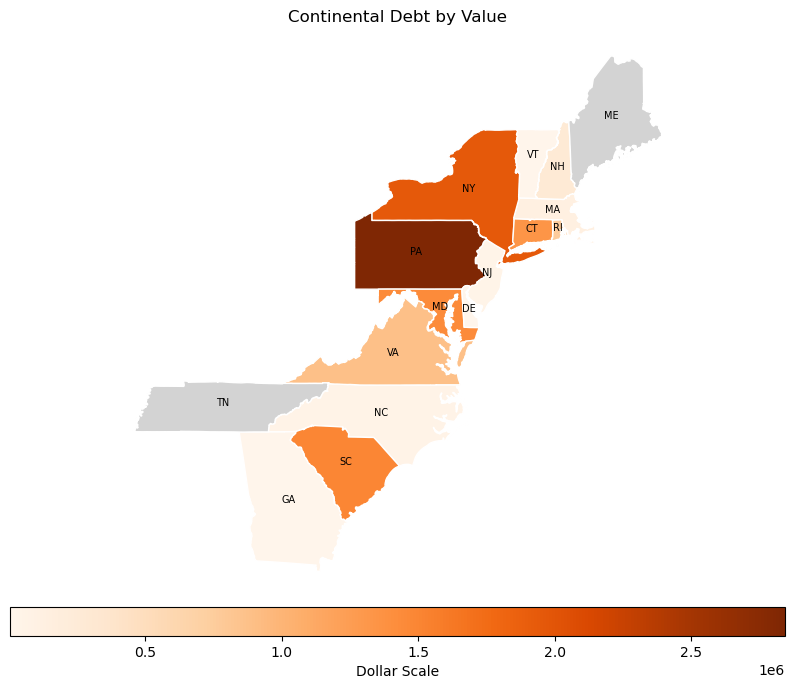

In [22]:
makeGraph("CD Total", "Continental Debt by Value", "Dollar Scale")